<p><span style="font-size:26pt;font-family:Arial;color:#000000;background-color:transparent;font-weight:400;font-style:normal;font-variant:normal;text-decoration:none;vertical-align:baseline;white-space:pre;white-space:pre-wrap;">Exercise 1</span></p>
<p><br></p>

<p><span style="font-size:13.999999999999998pt;font-family:Arial;color:#000000;background-color:transparent;font-weight:400;font-style:normal;font-variant:normal;text-decoration:none;vertical-align:baseline;white-space:pre;white-space:pre-wrap;">In this exercise, we&rsquo;ll practice using the absolute maximum scaling and min max scaling techniques.</span></p>

<hr style="height:2px;border-width:0;color:black;background-color:black">

This data contains information on annual income and spending score for 200 regular customers at a mall who took a survey. Spending score represents how much they're likely to spend.

Run the code below to load this dataset.

In [14]:
import pandas as pd
from urllib.request import urlretrieve

#Reads in the dataset from a URL
url = "https://ac-101708228-virtuoso-prod.s3.amazonaws.com/uploads/download/78/mall_customer_dataset.csv"
urlretrieve(url, "mall_customer_dataset.csv")
mall_customers = pd.read_csv("mall_customer_dataset.csv",index_col=0)
mall_customers

,Annual Income ($),Spending Score (1-100)
CustomerID,,
1,15000,39
2,15000,81
3,16000,6
4,16000,77
5,17000,40
...,...,...
196,120000,79
197,126000,28
198,126000,74


<hr style="height:2px;border-width:0;color:black;background-color:black">

Run the cell below and note that centroids are aligned in a parallel fashion and that the k-means clusters fail to fit the natural clusters in the data. This is because the two features in this dataset use vastly different scales. Annual income ranges in the tens of thousands while spending score ranges between 1-100.

Create a more accurate view of this scatter plot by making the axes scaled. This should help to visualize why the clustering algorithm clustered the data the way that it did.

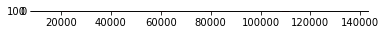

In [15]:
#Builds the kmeans clustering algorithm
from sklearn.cluster import KMeans
K=5
kmeans = KMeans(n_clusters=K)
cluster = kmeans.fit_predict(mall_customers[["Annual Income ($)","Spending Score (1-100)"]])

#Plots the data points onto a scatter plot and colors them according to cluster
#The red dots represent the centroids of each cluster
import matplotlib.pyplot as plt
plt.scatter(mall_customers["Annual Income ($)"],mall_customers["Spending Score (1-100)"],c=cluster)
plt.scatter(kmeans.cluster_centers_[:, 0], kmeans.cluster_centers_[:, 1], c='red')
#The code below forces the scatter plot to use the true scale of the chart
#Because the scale is so different, we can't even see the data in the chart
plt.axis('scaled')
plt.show()

<hr style="height:2px;border-width:0;color:black;background-color:black">

Create a line chart that plots both features on the Y-axis. For the X-axis, create a range of values based on the length of the mall_customers dataset.

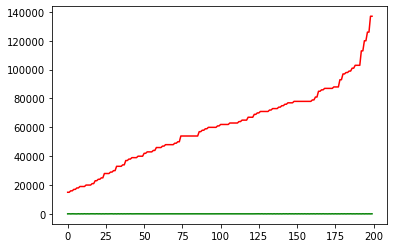

In [16]:
#Creates values for the x-axis which goes from 0 to 200 (the length of the dataset)
x = range(len(mall_customers))

#Imports the matplotlib library
import matplotlib.pyplot as plt

#Creates a plot where both features are on the y-axis
#We use the variable above for the x-axis
plt.plot(x,mall_customers["Annual Income ($)"],'red')
plt.plot(x,mall_customers["Spending Score (1-100)"],'green')
plt.show()

<hr style="height:2px;border-width:0;color:black;background-color:black">

Scale the data with absolute maximum scaling. Use the graph from the question above to check the new scale of both data features.

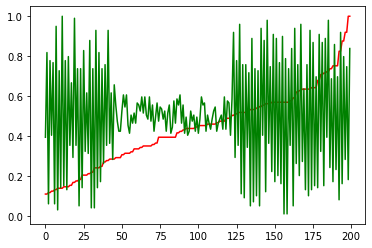

In [17]:
#We start by importing the function that lets us do absolute maximum scaling
from sklearn.preprocessing import MaxAbsScaler

#We then apply this to the mall customers dataset
abs_scaler = MaxAbsScaler().fit_transform(mall_customers)
#We store the output in a dataframe called mall_customers_abs
mall_customers_abs = pd.DataFrame(abs_scaler, columns=mall_customers.columns)

#We use the same plot as before on mall_customers_abs
#We can see that both features now use values on the same scale
plt.plot(x,mall_customers_abs["Annual Income ($)"],'red')
plt.plot(x,mall_customers_abs["Spending Score (1-100)"],'green')
plt.show()

<hr style="height:2px;border-width:0;color:black;background-color:black">

Repurpose the k-means code below to run on the data scaled with absolute maximum scaling. You should notice that the model is far more accurate at segmenting the data.

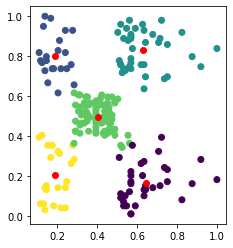

In [18]:
#We use the same k-means code as above
#This time we substitute mall_customers with mall_customers_abs
#In the output, we can see that the clusters more closely fit the natural clusters in the data
kmeans = KMeans(n_clusters=K)
cluster = kmeans.fit_predict(mall_customers_abs[["Annual Income ($)","Spending Score (1-100)"]])
plt.scatter(mall_customers_abs["Annual Income ($)"],mall_customers_abs["Spending Score (1-100)"],c=cluster)
plt.scatter(kmeans.cluster_centers_[:, 0], kmeans.cluster_centers_[:, 1], c='red')
plt.axis('scaled')
plt.show()

<hr style="height:2px;border-width:0;color:black;background-color:black">

Scale the data with min max scaling. Use the graph from the question above to check the new scale of both data features.

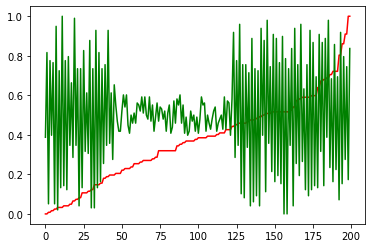

In [19]:
#We start by importing the function that lets us do min max scaling
from sklearn.preprocessing import MinMaxScaler

#We then apply this to the mall customers dataset
min_max_scaler = MinMaxScaler().fit_transform(mall_customers)
#We store the output in a dataframe called mall_customers_min_max
mall_customers_min_max = pd.DataFrame(min_max_scaler, columns=mall_customers.columns)

#We use the same plot as before on mall_customers_min_max
#We can see that both features use values on the same scale
plt.plot(x,mall_customers_min_max["Annual Income ($)"],'red')
plt.plot(x,mall_customers_min_max["Spending Score (1-100)"],'green')
plt.show()

<hr style="height:2px;border-width:0;color:black;background-color:black">

Repurpose the k-means code below to run on the data scaled with min max scaling. As with absolute maximum scaling, you should notice that the model is far more accurate at segmenting the data.

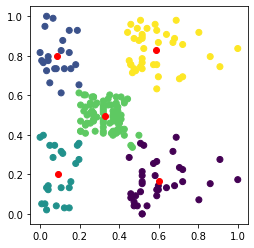

In [20]:
#We use the same k-means code as above
#This time we substitute mall_customers with mall_customers_min_max
#In the output, we can see that the clusters more closely fit the natural clusters in the data
kmeans = KMeans(n_clusters=K)
cluster = kmeans.fit_predict(mall_customers_min_max[["Annual Income ($)","Spending Score (1-100)"]])
plt.scatter(mall_customers_min_max["Annual Income ($)"],mall_customers_min_max["Spending Score (1-100)"],c=cluster)
plt.scatter(kmeans.cluster_centers_[:, 0], kmeans.cluster_centers_[:, 1], c='red')
plt.axis('scaled')
plt.show()